In [1]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt

attLength=[210,120]  # cm
dE2L=[38000*0.45*0.64,9700]# BC408, EJ230 [nph/MeVe-]


NOTE
==

For BC408, [reference](https://www.crystals.saint-gobain.com/products/bc-408-bc-412-bc-416) says `LY=(40-50% of NaI(Tl)) * 0.64`

For NaI(Tl), `38 nph/keV`, which can be found [here](https://www.crystals.saint-gobain.com/sites/imdf.crystals.com/files/documents/sodium-iodide-material-data-sheet_0.pdf), is used.

EJ230's properties can be found [here](https://eljentechnology.com/products/plastic-scintillators/ej-228-ej-230)

The attenuation lengths for both scintillators can be found in the same links as above.

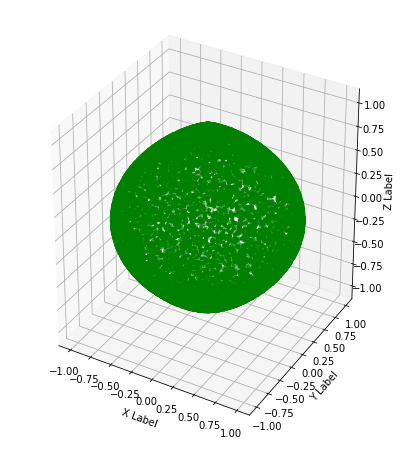

In [2]:
np.random.seed(2718)
pi=np.pi

#rnd0=np.random.random(5000)
#rnd1=np.random.random(5000)
#cos=2.0*(rnd0)-1.0
#phi=2.0*pi*(rnd1)
cos=np.random.uniform(-1,1,20000)
phi=np.random.uniform(0,2.0*pi,20000)
px=(1-cos*cos)*np.cos(phi)
py=(1-cos*cos)*np.sin(phi)
pz=cos

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(px, py, pz,s=8, c='g', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

**OK** now you generated the 4pi sperical random distribution!

**Next step** Read the given probability distribution functions for wavelength, reflactivity...

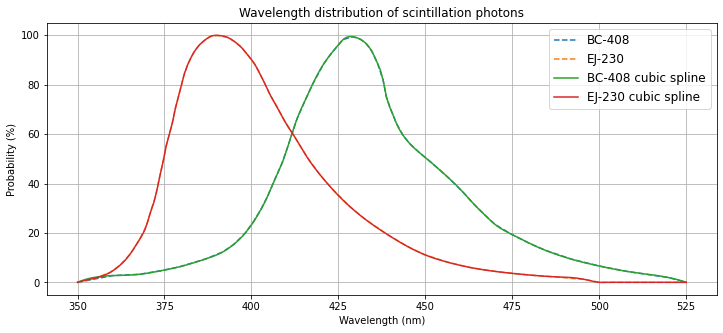

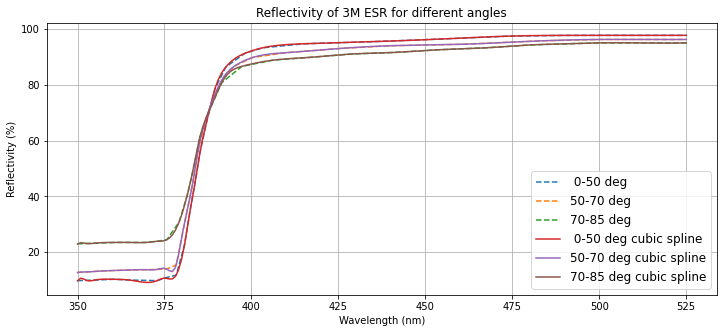

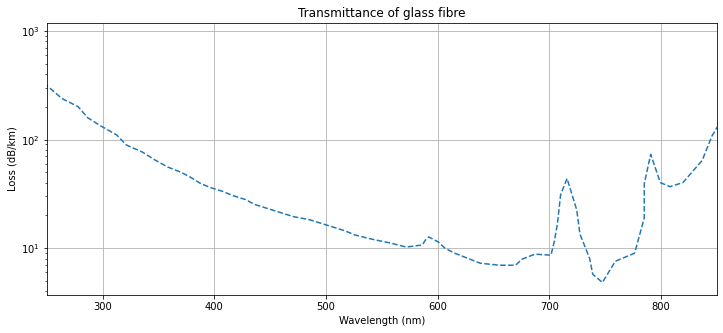

In [3]:
dataPath="prop/"
wlBC,wpBC = np.loadtxt(dataPath+"LY_BC408.txt", comments="#", delimiter="\t", unpack=True)
wlEJ,wpEJ = np.loadtxt(dataPath+"LY_EJ230.txt", comments="#", delimiter="\t", unpack=True)

#######################################################################
# NOTE; this data contains some arbitrary extrapolated points by eyes
#       to make smooth spline points. To be improved later
#######################################################################
wl3M0,wp3M0,wl3M1,wp3M1,wl3M2,wp3M2= np.loadtxt(dataPath+"3M_ref.txt", comments="#", delimiter="\t", unpack=True)


wlFib,wpFib=np.loadtxt(dataPath+"Fujikura_GlassFibre_LightAtt.txt", comments="#", delimiter="\t", unpack=True)

## Cubic spline
from scipy.interpolate import interp1d
fsp0 = interp1d(wlBC,wpBC, kind='cubic')
fsp1 = interp1d(wlEJ,wpEJ, kind='cubic')
fsp2 = interp1d(wl3M0,wp3M0, kind='cubic')
fsp3 = interp1d(wl3M1,wp3M1, kind='cubic')
fsp4 = interp1d(wl3M2,wp3M2, kind='cubic')
wl=np.linspace(350,525,200)

fig, ax = plt.subplots(figsize=(12,5))

ax.plot(wlBC,wpBC,label='BC-408',ls='--')
ax.plot(wlEJ,wpEJ,label='EJ-230',ls='--')

ax.plot(wl,fsp0(wl),label='BC-408 cubic spline')
ax.plot(wl,fsp1(wl),label='EJ-230 cubic spline')
ax.set(xlabel='Wavelength (nm)', ylabel='Probability (%)',
       title='Wavelength distribution of scintillation photons')
ax.grid()
ax.legend(loc='upper right',fontsize='large')

plt.show()

fig, ax = plt.subplots(figsize=(12,5))

ax.plot(wl3M0,wp3M0,label=' 0-50 deg',ls='--')
ax.plot(wl3M1,wp3M1,label='50-70 deg',ls='--')
ax.plot(wl3M2,wp3M2,label='70-85 deg',ls='--')

ax.plot(wl,fsp2(wl),label=' 0-50 deg cubic spline')
ax.plot(wl,fsp3(wl),label='50-70 deg cubic spline')
ax.plot(wl,fsp4(wl),label='70-85 deg cubic spline')

ax.set(xlabel='Wavelength (nm)', ylabel='Reflectivity (%)',
       title='Reflectivity of 3M ESR for different angles')
ax.grid()
ax.legend(loc='lower right',fontsize='large')

plt.show()

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(wlFib,wpFib,label='Fujikura S-series',ls='--')
ax.set(xlabel='Wavelength (nm)', ylabel='Loss (dB/km)',
       title='Transmittance of glass fibre')
ax.grid()
ax.set_yscale('Log')
ax.set_xlim(250,850)

plt.show()


All data are extracted by using [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer/)

Some part shows instability when applying the cubic spline, so additional points are arbitrary added.

More relevant data points must be obtained later

**NOTE**
Below code has not been completed yet..

Efficiency for BC= 0.29135831245265426
Efficiency for EJ= 0.27430326969497476


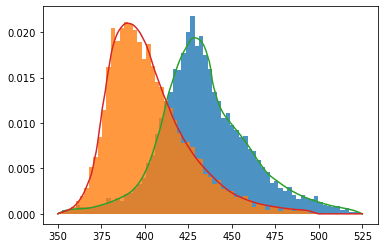

In [4]:
import scipy.stats as st

ntrial=500000

def rndomdist(ndata,x,func):
    data=[]
    eff=0
    ntry=0
    for i in range(len(x)):
        rnd=np.random.uniform(0,100)
        if(func(x[i])>rnd):
            data.append(x[i])
            eff=eff+1
        if(eff>=ndata):break
        ntry=ntry+1
    return data,float(eff/ntry)

rnd0=np.random.uniform(350,525,ntrial)

nprod=10000
dataBC,eff0=rndomdist(nprod,rnd0,fsp0)
dataEJ,eff1=rndomdist(nprod,rnd0,fsp1)
print('Efficiency for BC=',eff0)
print('Efficiency for EJ=',eff1)
xbin=np.linspace(350,525,int(175/5)*2)
plt.hist(dataBC[:],bins=xbin,density=True,alpha=0.8)
plt.hist(dataEJ[:],bins=xbin,density=True,alpha=0.8)
plt.plot(wl,0.0195/100*fsp0(wl))
plt.plot(wl,0.021/100*fsp1(wl))
plt.show()

Simple test to generate _N_ photons along the line that perpendicularly pass through the plastic scintillator (100mm x 300mm x 5mm)


**NOTE**: Let's just consider the total reflection for simplicity now.

In [ ]:

def reflectlines(ox,oy,oz,dx,dy,dz,delta,totlen,nrefmax,xbound,ybound,zbound):
    length=0.0
    x=[ox]
    y=[oy]
    z=[oz]
    i=0
    nref=0
    endz=[False,False]
    while length<totlen and nref<nrefmax:
        nextpos=[x[i]+dx*delta,y[i]+dy*delta,z[i]+dz*delta]
        if nextpos[0]<=xbound[0] or nextpos[0]>=xbound[1]:
            dx=-1*dx
            nref=nref+1
        if nextpos[1]<=ybound[0] or nextpos[1]>=ybound[1]:
            dy=-1*dy
            nref=nref+1
        if nextpos[2]<=zbound[0] or nextpos[2]>=zbound[1]:
            dz=-1*dz
            #nref=nref+1
            if nextpos[2]<=zbound[0]:
                endz[0]=True
            else:
                endz[1]=True
            break
        x.append(nextpos[0])
        y.append(nextpos[1])
        z.append(nextpos[2])
        length = length+delta
        i=i+1
    return x,y,z,endz

rndy=np.random.uniform(0,5,nprod)
#fig, ax = plt.subplots(3,1,figsize=(12,8))
#ax[0].set_xlim( -55, 55)
#ax[0].set_ylim(-1,6)
#ax[1].set_xlim(-155,155)
#ax[1].set_ylim(-1,6)

fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-155,155)
ax.set_ylim(-55,55)
ax.set_zlim(-1,6)

ax.plot([-150,-150],[+50,+50],[0,5],color='k',ls='--',alpha=0.5)
ax.plot([-150,+150],[+50,+50],[0,0],color='k',ls='--',alpha=0.5)
ax.plot([-150,+150],[+50,+50],[5,5],color='k',ls='--',alpha=0.9)
ax.plot([-150,-150],[-50,+50],[0,0],color='k',ls='--',alpha=0.5)
ax.plot([-150,-150],[-50,+50],[5,5],color='k',ls='--',alpha=0.9)
ax.plot([-150,-150],[-50,-50],[0,5],color='k',ls='--',alpha=0.9)
ax.plot([-150,+150],[-50,-50],[0,0],color='k',ls='--',alpha=0.9)
ax.plot([-150,+150],[-50,-50],[5,5],color='k',ls='--',alpha=0.9)
ax.plot([+150,+150],[-50,-50],[0,5],color='k',ls='--',alpha=0.9)
ax.plot([+150,+150],[-50,+50],[0,0],color='k',ls='--',alpha=0.9)
ax.plot([+150,+150],[-50,+50],[5,5],color='k',ls='--',alpha=0.9)
ax.plot([+150,+150],[+50,+50],[0,5],color='k',ls='--',alpha=0.9)

#### Calculate the number of allowed reflections
def getNumRef(ref):
    vanish=0
    prob=ref
    num=1
    while vanish==0:
        rnd=np.random.random()
        if rnd>prob:
            vanish=1
        else:
            prob = prob*ref
            num=num+1
    return num

narriveZ=np.zeros(8)
nev=nprod
#nev=8000
numRefBC=[]
numRefEJ=[]
for i in range(nev):
    wl=dataBC[i]
    ref=fsp2(wl)/100.0 # Use the function for angle=0 just for now
    nRef=getNumRef(ref)
    numRefBC.append(nRef)
    x,y,z,endz=reflectlines(0,rndy[i],0,px[i],py[i],pz[i],0.1,attLength[0]*10,nRef,[-50,50],[0,5],[-150,150])
    if(i%20==0):
        color='gray'
        alpha=0.4
        if (endz[0]==True or endz[1]==True):
            color='orange'
            alpha=1.0
        #ax[0].plot(x,y)
        #ax[1].plot(z,y)
        ax.plot(z,x,y,color=color,alpha=alpha)
    if endz[0]==True:
        narriveZ[0]=narriveZ[0]+1
    if endz[1]==True:
        narriveZ[1]=narriveZ[1]+1
    #####################################
    # What if we use narrower counter??
    #####################################
    x,y,z,endz=reflectlines(0,rndy[i],0,px[i],py[i],pz[i],0.1,attLength[0]*10,nRef,[-40,40],[0,5],[-150,150])
    if endz[0]==True:
        narriveZ[2]=narriveZ[2]+1
    if endz[1]==True:
        narriveZ[3]=narriveZ[3]+1
    
    wl=dataEJ[i]
    ref=fsp2(wl)/100.0 # Use the function for angle=0 just for now
    nRef=getNumRef(ref)
    numRefEJ.append(nRef)
    x,y,z,endz=reflectlines(0,rndy[i],0,px[i],py[i],pz[i],0.1,attLength[1]*10,nRef,[-50,50],[0,5],[-150,150])
    if endz[0]==True:
        narriveZ[4]=narriveZ[4]+1
    if endz[1]==True:
        narriveZ[5]=narriveZ[5]+1
    #####################################
    # Narrower counter case
    #####################################
    x,y,z,endz=reflectlines(0,rndy[i],0,px[i],py[i],pz[i],0.1,attLength[1]*10,nRef,[-40,40],[0,5],[-150,150])
    if endz[0]==True:
        narriveZ[6]=narriveZ[6]+1
    if endz[1]==True:
        narriveZ[7]=narriveZ[7]+1



In [ ]:
setstr=['BC-408 100mm','BC-408 80mm', 'EJ-230 100mm', 'EJ-230 80mm']
nsensors=8 ### Yet an arbitrary number..
pde=0.3    ### Roughly determined by Hamamatsu's datasheet
narrph=np.zeros(4)
ndetph1=np.zeros(4)
ndetph2=np.zeros(4)
ndetph4=np.zeros(4)
ndetph6=np.zeros(4)
ndetph8=np.zeros(4)
for iset in range(4):
    print(setstr[iset])
    #print('*** NumPho and at both of z ends ***')
    #print(narriveZ[2*iset],narriveZ[2*iset+1])
    areaFrac=3*3/(100*5)
    if iset%2==1:
        areaFrac=3*3/(80*5) # for smaller width counter

    #print('Area fraction / AF*PDE / Num. photons at the end / Num. p.e. at the sensor')
    narrph[iset]=(narriveZ[2*iset]+narriveZ[2*iset+1])/2.0/nev*dE2L[int(iset/2)]
    ndetph1[iset]=areaFrac*pde*(narrph[iset])
    ndetph2[iset]=2*areaFrac*pde*(narrph[iset])
    ndetph4[iset]=4*areaFrac*pde*(narrph[iset])
    ndetph6[iset]=6*areaFrac*pde*(narrph[iset])
    ndetph8[iset]=8*areaFrac*pde*(narrph[iset])
    #print(areaFrac,pde,areaFrac*pde,narrph[iset],ndetph[iset])

fig = plt.figure(figsize=(7,5))
plt.title('Npho')
plt.ylim(0,900)
plt.ylabel('Number of photons')
plt.plot(setstr,narrph)

fig = plt.figure(figsize=(7,5))
plt.title('Npe')
plt.ylim(0,48)
plt.ylabel('Number of p.e. @ N-sensors')
plt.plot(setstr,ndetph1,label='N=1')
plt.plot(setstr,ndetph2,label='N=2')
plt.plot(setstr,ndetph4,label='N=4')
plt.plot(setstr,ndetph6,label='N=6')
plt.plot(setstr,ndetph8,label='N=8')
plt.legend(loc='upper right')

fig = plt.figure(figsize=(7,5))
xbin=np.linspace(0,30,30)
plt.title('Number of reflections')
plt.hist(numRefBC,bins=xbin,density=True,alpha=0.8,label='BC-408')
plt.hist(numRefEJ,bins=xbin,density=True,alpha=0.8,label='EJ-230')
plt.legend(loc='upper right')
plt.yscale('Log')
plt.show()

print(np.array(numRefBC).mean(),np.array(numRefEJ).mean())

Summary
==
* Smaller counter will give slightly more photons
    * (Pros) Better **S/N**
    * (Cons) Need to increase the segmentation
* Longer wavelength is better
    * (Pros) A little longer decay time **1.8ns** (EJ-230) -> **2.4ns** (BC-408)
* Expected number of photons are not so large as 50 per SiPM
    * S/N is not sufficient at 10<sup>11</sup> n<sub>eq</sub>/cm<sup>2</sup>?
        * Cooling may help??

**NOTE**
* These estimations are not from the precise simulation
    * Propagation length was fixed to the attenuation length
    * Assuming there are no light reflection at both z-ends
    * PDE's wavelength dependence has not been considered yet


In [ ]:
#### Play around with Cherenkov photon
import math
ridxA=1.49 # PMMA (Acrylic plastic)
ridxG=1.52 # Glass
ac=math.acos(1.0/ridxA)
print(ac*180./pi)
betas=np.linspace(0.55,1,100)
def getAng(ridx,beta):
    val=np.zeros(len(beta))
    for i in range(len(beta)):
        if ridx*beta[i]<1.0:continue
        val[i]=math.acos(1.0/ridx/beta[i])
    return val
angles=getAng(ridxA,betas)
angles2=getAng(ridxG,betas)
fig,ax=plt.subplots(figsize=(10,5))

ax.plot(betas,angles,label='PMMA (Acrylic plastic)')
ax.plot(betas,angles2,label='Glass')
#### critical angle in case of Air ourside
ridx_0=1.000 # Air
ridx_1=1.333 # Water
theta_c0=[math.asin(ridx_0/ridxA),math.asin(ridx_0/ridxG)]
theta_c1=[math.asin(ridx_1/ridxA),math.asin(ridx_1/ridxG)]
#print(theta_c0*180./pi, theta_c1*180./pi)
emass=0.510998950
mmass=105.658377
emom=np.array([0.4,0.5,0.6,0.7,0.8,1.0,1.25,1.5,1.75,2.0,2.5,3.0,4.0,5.0,7.5,10,20,50,100,110])
mmom=np.array([70,75,80,85,90,95,100,105,110,115,120,125,130,135,140])
ebeta=emom/np.sqrt(emom*emom + emass*emass)
mbeta=mmom/np.sqrt(mmom*mmom + mmass*mmass)
ax.plot([0.5,1.02],[theta_c0[0],theta_c0[0]],'g--',label='Critical angle for Acryl/Air')
ax.plot([0.5,1.02],[theta_c0[1],theta_c0[1]],'r--',label='Critical angle for Glass/Air')
ax.legend(loc='upper left',fontsize='large')
ax.set_ylim(-0.02,0.88)
ax.set_xlim(0.53,1.02)
ax.set_ylabel(r'$\theta$ [rad]',size='large')
ax.set_xlabel(r'$\beta$',size='large')
#ax.grid()

print(40*pi/180.)
ax2=ax.twinx()

ax2.plot(ebeta,emom,color='blue')
ax2.plot(mbeta,mmom,color='red')
#ax2.xscale('log')
#ax2.set_yscale('log')
ax2.grid()
ax2.set_ylim(0.25,140)
ax2.text(0.55,60,s=r'$\mu^\pm$',fontsize='xx-large',c='r')
ax2.text(0.9,5,s=r'$e^\pm$',fontsize='xx-large',c='b')
ax2.set_ylabel('Momentum [MeV/c]',size='large')
#plt.xlabel(r'$\beta$',size='large')

fig.tight_layout()
plt.show()

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

n1=1.5
n2=1.4
n3=1.3
theta=np.linspace(0,math.pi/2.0,200)

thetaC12=math.asin(n2/n1)

def calcNewAngle(n1,n2,theta,theta_c):
    theta2=np.zeros(len(theta))
    for i in range(len(theta)):
        if theta[i]<theta_c:
            theta2[i] = math.sin( n1 * math.sin(theta[i]) / n2 )
        else:
            #continue
            theta2[i] = math.pi/2.0
    return theta2

theta_c=math.sin( n2 / n1 )
print(theta_c/math.pi*180.0)
theta2=calcNewAngle(n1,n2,theta,theta_c)
theta_c=math.sin( n3 / n2 )
print(theta_c/math.pi*180.0)
theta3=calcNewAngle(n2,n3,theta2,theta_c)
theta_c=math.sin( n3 / n1 )
theta4=calcNewAngle(n1,n3,theta,theta_c)

plt.figure(figsize=(10,10))
plt.plot(180*theta/math.pi,180*theta2/math.pi)
plt.plot(180*theta/math.pi,180*theta3/math.pi)
plt.plot(180*theta/math.pi,180*theta4/math.pi)
plt.xlim(0,95)
plt.ylim(0,95)
plt.grid()
plt.show()